## Yearly water demand in the Greater Stuttgart area

In [1]:
from utils.yearly_data_prep import create_yearly_df
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = create_yearly_df()

In [3]:
## Solve for one NA value in the 'Wert' column using linear interpolation
# Identify the index of the NaN value in the 'Wert' column
nan_index = df["Wert"].isna()

# Replace NaN with the mean of the previous and next year's values
df.loc[nan_index, "Wert"] = (df["Wert"].shift(1) + df["Wert"].shift(-1)) / 2

In [4]:
correlation = df["Wert"].corr(df["Summe_Einwohner"]).round(2)
print(correlation)

0.73


In [5]:
# Prepare the data
X = df[["Summe_Einwohner", "Wert"]]
y = df["Wasserbereitstellung_Summe"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Wasserbereitstellung_Summe   R-squared:                       0.799
Model:                                    OLS   Adj. R-squared:                  0.791
Method:                         Least Squares   F-statistic:                     89.68
Date:                        Thu, 30 Jan 2025   Prob (F-statistic):           2.00e-16
Time:                                09:59:49   Log-Likelihood:                -125.21
No. Observations:                          48   AIC:                             256.4
Df Residuals:                              45   BIC:                             262.0
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

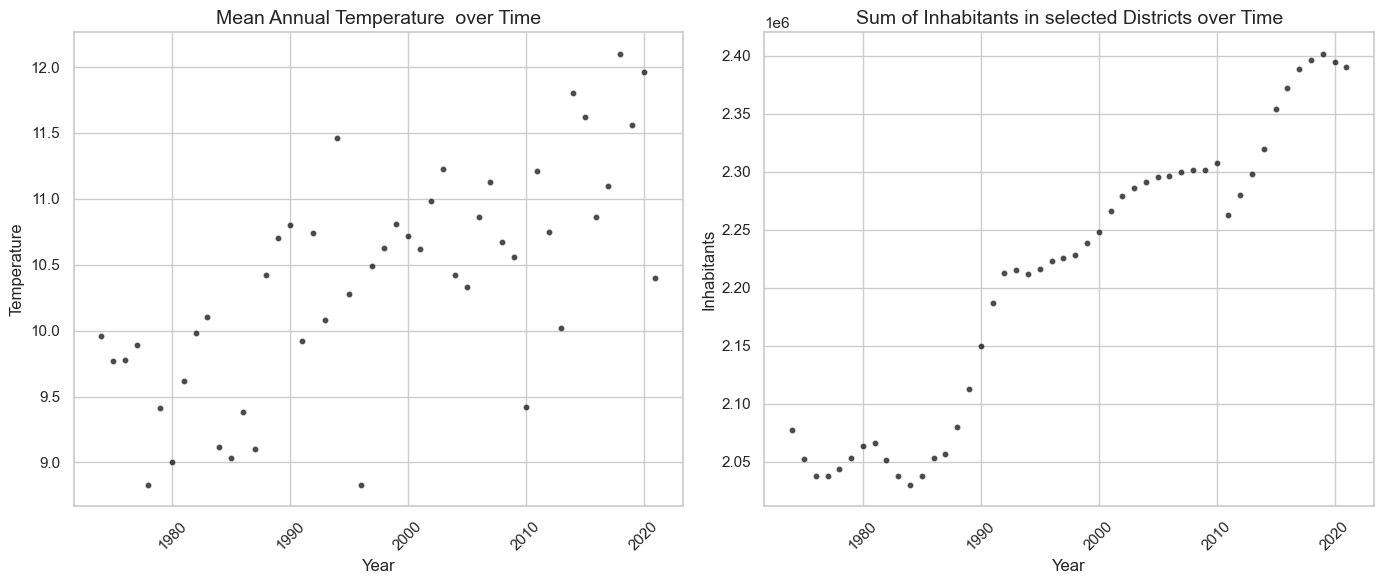

In [9]:
# Set the style
sns.set(style="whitegrid")

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot for Wert
sns.scatterplot(
    x="Jahr", y="Wert", data=df, ax=ax1, color="black", s=20, edgecolor="w", alpha=0.7
)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Temperature", fontsize=12)
ax1.set_title("Mean Annual Temperature  over Time", fontsize=14)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(True)

# Scatterplot for Summe_Einwohner
sns.scatterplot(
    x="Jahr",
    y="Summe_Einwohner",
    data=df,
    ax=ax2,
    color="black",
    s=20,
    edgecolor="w",
    alpha=0.7,
)
ax2.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("Inhabitants", fontsize=12)
ax2.set_title("Sum of Inhabitants in selected Districts over Time", fontsize=14)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()